## Задача 3.

Итак, формулировку задачи как обычно можно посмотреть [здесь](https://classroom.google.com/u/1/c/NDQ0NzkwNDEzMjc3). Выведем из условия систему диффуров, чтобы найти координаты движения Земли.

*Замечание*: всюду далее $\overrightarrow{r} = \overrightarrow{r(t)} = (x(t), y(t))$.

Так как 
$$ F = \frac{G\cdot m_1\cdot m_2}{\|r\|^2} ,$$
то в силу второго закона Ньютона, а также учитывая, что Земля притягивается к Солнцу, получаем
$$ \overrightarrow{F} = \ddot{\overrightarrow{r}}\cdot m_2 = \frac{G\cdot m_1\cdot m_2\cdot(-\overrightarrow{r})}{\|r\|^3}. $$
Это можно записать покоординатно, тогда получим систему
$$
\begin{cases}
   \ddot{x} = \frac{-G\cdot m_1\cdot x}{\|r\|^3},\\
   \ddot{y} = \frac{-G\cdot m_1\cdot y}{\|r\|^3}.
 \end{cases}
$$
Можно также превратить эту систему из двух уравнений, в систему из 4 уравнений. Для этого воспользуемся тем, что вектор скорости имеет вид (покомпонентно) $(u, v) = (\dot{x}, \dot{y})$, а вектор ускорения $(\dot{u}, \dot{v}) = (\ddot{x}, \ddot{y})$, тогда получаем:
$$
\begin{cases}
   \dot{u} = \frac{-G\cdot m_1\cdot x}{\|r\|^3},\\
   \dot{x} = u,\\
   \dot{v} = \frac{-G\cdot m_1\cdot y}{\|r\|^3},\\
   \dot{y} = v.
 \end{cases}
$$
Осталось учесть граничные условия. Вспомним, что $x(0) = R, y(0) = 0, u(0) = 0, v(0) = V$. Отсюда получаем
$$
\begin{cases}
   \dot{u} = \frac{-G\cdot m_1\cdot x}{\sqrt{x^2 + y^2}^3},\\
   \dot{x} = u,\\
   \dot{v} = \frac{-G\cdot m_1\cdot y}{\sqrt{x^2 + y^2}^3},\\
   \dot{y} = v,\\
   x(0) = R, y(0) = 0, u(0) = 0, v(0) = V.
 \end{cases}
$$

Теперь эту систему решим с помощью метода Эйлера, его можно посмотреть [здесь](https://mipt.ru/drec/forstudents/study/studyMaterials/3kurs/vych_math_2.pdf).

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Итак, пересчитаем все в астрономических единицах. После этого получим уже другие значения:

При пересчете в астрономические единицы мы получим другие значения:

In [2]:
# Time in years

R = 1  # R
mg = 4 * np.pi ** 2  # G * m_1
V = 2 * np.pi  # V

Наконец, напишем основную функцию.

In [3]:
def ODU(type_grid='days', period=1, years=5):  # Default: days and one period (years=5)
    u_prev, x_prev, v_prev, y_prev = 0, R, V, 0  # Initial  data
    
    data = {  # Dictionary with data
            'u_arr': [u_prev],  
            'x_arr': [x_prev],
            'v_arr': [v_prev],
            'y_arr': [y_prev]
           }
    
    if type_grid == 'seconds':  # Check the type
        n = years * 365 * 24 * 60 * 60
    elif type_grid == 'minutes':
        n = years * 365 * 24 * 60
    elif type_grid == 'hours':
        n = years * 365 * 24
    elif type_grid == 'days':
        n = years * 365

    h = (years / n) * period  # Compute h

    for i in range(0, n, period):  # Head loop
        u_next = u_prev - h * (mg * x_prev) / (np.sqrt(x_prev ** 2 + y_prev ** 2) ** 3)
        x_next = x_prev + h * u_prev
        v_next = v_prev - h * (mg * y_prev) / (np.sqrt(x_prev ** 2 + y_prev ** 2) ** 3)
        y_next = y_prev + h * v_prev
        
        for key, value in zip(data.keys(), [u_next, x_next, v_next, y_next]):  # Just add our new values in data
            data[key].append(value)
        
        u_prev, x_prev, v_prev, y_prev = u_next, x_next, v_next, y_next

    return data

In [4]:
solution = ODU('seconds', 20, 10)  # Calculated for 10 years

В отдельный датафрейм сохраним наши получившиеся координаты:

In [5]:
solution_coordinates = pd.DataFrame({
                                    'x_arr': solution['x_arr'],
                                    'y_arr': solution['y_arr']
                                    })

А также построим график движения:

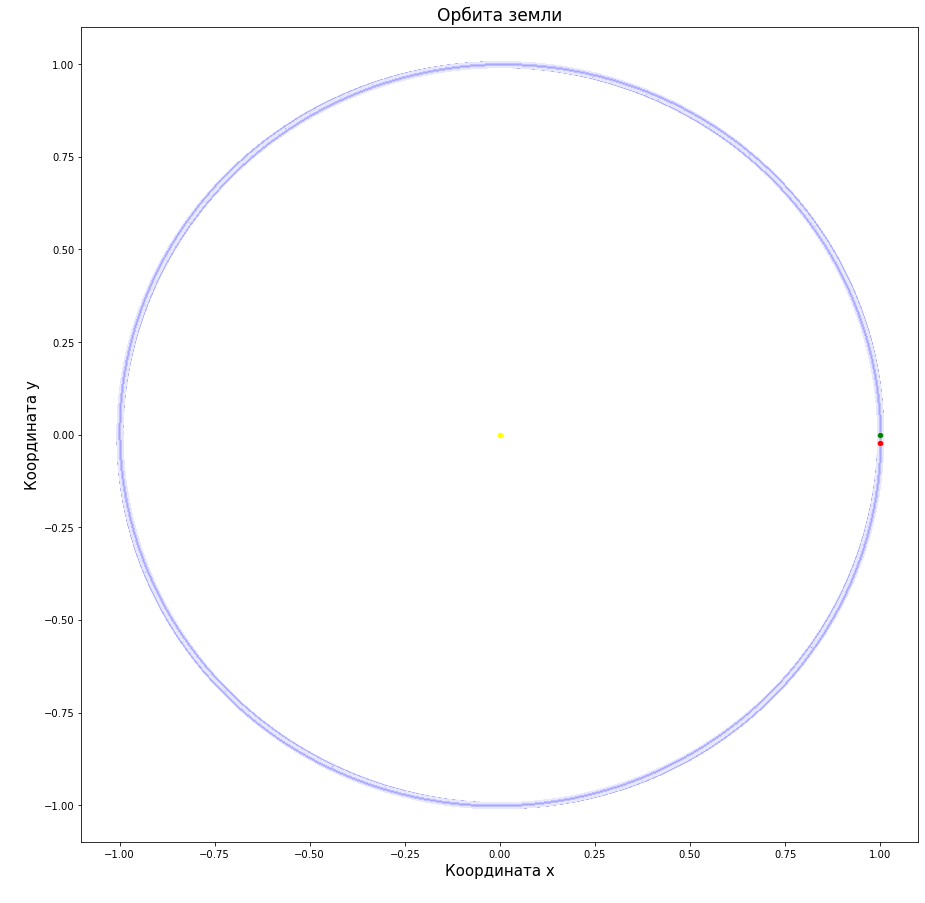

In [6]:
fig, ax = plt.subplots(figsize=[15, 15])

ax = sns.scatterplot(x='x_arr', y='y_arr', data=solution_coordinates, color='blue')

ax.set_title('Орбита земли', fontsize=17)
ax.set_xlabel('Координата x\n', fontsize=15)
ax.set_ylabel('\nКоордината y', fontsize=15)

sns.scatterplot(x=[1], y=[0], color='green')  # Start point
sns.scatterplot(x=solution_coordinates.tail(1).x_arr, y=solution_coordinates.tail(1).y_arr, color='red')  # Final point
sns.scatterplot(x=[0], y=[0], color='yellow');  # Sun

### Оценка Рунге

Для метода порядка $p$ имеем
$$ y(x_{i+1}) - y_{h,x_{i+1}} \thickapprox \frac{2^p}{2^p - 1}\cdot \left(y_{h/2,x_{i+1}} - y_{h,x_{i+1}}\right), $$
где $y(x_{i+1})$ - истинное значение функции $y(x)$ в точке $x_{i+1}$, а $y_{h,x_{i+1}}$ - значение, посчитанное с помощью численного метода на равномерной сетке с шагом $h$ в точке $x_{i+1}$. У метода Эйлера $p=1$. На 10 годах посчитаем погрешность:

In [7]:
solution_sec_20 = solution  # Almost calculated
solution_sec_40 = ODU('seconds', 40, 10)
solution_sec_80 = ODU('seconds', 80, 10)

In [8]:
solutions_test = [solution_sec_20, solution_sec_40, solution_sec_80]  # Save our solutions for Runge

In [9]:
2 * (solution_sec_20['x_arr'][-1] - solution_sec_40['x_arr'][-1])  # Measurement error for x_last

0.0006653367281355127

In [10]:
2 * (solution_sec_20['y_arr'][-1] - solution_sec_40['y_arr'][-1])  # Measurement error for y_last

0.04712793752063927